# Introduction to Data Science, Lab 10-11 (11/18)
- Naive Bayes: generic model and assumptions, examples (Gaussian, Multivariate Bernoulli, Multinomial);
- Text classification pipeline for music genre prediction (tokenization, vectorization, modeling). 

## *Naive Bayes*
Naive Bayes classifier consists of two parts: (1) Naive Bayes *generative* model (*generative* models approximate the conditional distribution $X|Y=y$ rather than $Y|X=x$ as in discriminative models) and (2) Naive Bayes classification rule. Given a data-generating distribition $(X,Y)\sim P$ over $\mathbb{R}^d\times K$,  (1) models the conditional distribution $X|Y=y\sim P_{\theta}$ for some parameter $\theta\in\Theta$ and computes the maximum likelihood estimator $\hat{\theta}=\hat{\theta}_{MLE}$ to obtain the approximate generative distribution $P_{\hat{\theta}}$. Then, (2) will classify all new inputs $x$ based on the maximum a-posteriori decision rule, i.e. by maximizing the class probability $p(y|X=x)$, which is calculated from $P_{\hat{\theta}}$.

### *Naive Bayes Classification*
Let us start by understanding (2)$-$the classification model. Assume the approximate conditional distribution for $X|Y=y\sim P_{\hat{\theta}}$ is found using (1). One key assumption of Naive Bayes is that attributes of $X$ are *mutually independent* conditioned on $Y=y$ (random variables $Z_1,Z_2,\ldots,Z_m$ are *mutually independent* if their cumulative distribution functions satisfy $F(z_1,z_2,\ldots,z_m)=F_1(z_1)F(z_2)\ldots F_m(z_m)$, which implies a similar identity for their probability mass functions or probability density functions when $Z_i$ are all discrete or all continuous, respectively). Then, applying Bayes rule, we have

\begin{align*}
p(y|x_1,x_2,\ldots,x_d)=\frac{p(x_1,x_2,\ldots,x_d|y)p(y)}{p(x_1,x_2,\ldots,x_d)}\propto p(x_1,x_2,\ldots,x_d|y)p(y)=p(x_1|y)p(x_2|y)\ldots p(x_d|y)p(y)=p(y)\prod_{i=1}^{d}p(x_i|y)
\end{align*}

where $(x_1,x_2,\ldots,x_d)$ is conditioned on, so that $p(x_1,x_2,\ldots,x_d)$ is just a constant.<br/>
Question: What is $p$ here? If $X,Y$ are discrete, then $p$ simply denotes the appropriate marginal probability mass function, but what if $X$ is continuous? Why would the Bayes rule even hold when one variable is discrete and the other is continuous? Check out [this article](https://cpb-us-w2.wpmucdn.com/sites.gatech.edu/dist/2/436/files/2017/08/16_BayesRVs-su14.pdf).

Note that $p(y)$ is the prior distribution on $Y$ (which can also be estimated as $\hat{p}(y)$ using maximum likelihood estimation under an approprite distribution), while $p(x_i|y)$ can be computed using the conditional probability distribution $P_{\hat{\theta}}$ found in step (1), giving us the posterior $p(y|x_1,x_2,\ldots,x_d)$. Then, (2) predicts $\hat{y}=\text{argmax}\:p(\hat{y}|x_1,x_2,\ldots,x_d)$ to be the maximum a-posteriori estimator.

### *Naive Bayes Generation*
Finding the generative model (1) requires more assumptions; in partucular, we need to specify the family of parametric distributions $\mathcal{P}=\{P_{\theta}\colon\theta\in\Theta\}$ for $X|Y=y$. This choice is largely guided by the nature of $X$; for continuous-valued evidence, a common choice is the so-called *Gaussian Naive Bayes*, which assumes $X_j|Y=y\sim\mathcal{N}(\mu_{jy},\sigma_{jy}^2)$ for any $j\in[d]$ (note that parameters $\mu_{jy}$ and $\sigma^2_{jy}$ are selected separately for every attribute-label pair). When each attribute $X_j$ of evidence $X$ is binary (as is the case for the standard text tokenization), one common model is *Bernoulli Naive Bayes*, which assumes $X_j|Y=y\sim\text{Bernoulli}(p_{jy})$. Let's derive the maximum likelihood estimators $\hat{p}_{jy}$ for this model as an example.

### *Example: Bernoulli NB*
Let $\mathcal{D}=\{(x_1,y_1),(x_2,y_2),\ldots,(x_n,y_n)\}$ be samples from independent random variables $(X_i,Y_i)\sim P$ satisfying the Bernoulli conditional model with a matrix of parameters $P$. The likelihood function is 

\begin{align*}
\mathcal{L}(P|\mathcal{D})=p_P(\mathcal{D})&=\prod_{i=1}^{n}p_{P_{y_i}}(x_i,y_i)=\prod_{i=1}^{n}p_{P_{y_i}}(x_i|y_i)p(y_i)=\prod_{i=1}^{n}p(y_i)\prod_{j=1}^{d}p_{P_{jy_i}}(x_{ij}|y_i)=\prod_{i=1}^{n}p(y_i)\prod_{j=1}^{d}P_{jy_i}^{x_{ij}}(1-P_{jy_i})^{(1-x_{ij})}\\
l(P)=\log\mathcal{L}(P|\mathcal{D})&=\sum_{i=1}^{n}\log p(y_i)\sum_{j=1}^{d}x_{ij}\log P_{jy_i}+(1-x_{ij})\log(1-P_{jy_i})=\sum_{k=1}^{K}\sum_{i\in C_k}\log p(Y=k)\sum_{j=1}^{d}x_{ij}\log P_{jk}+(1-x_{ij})\log(1-P_{jk})
\end{align*}

where we partitioned obsevations $y_i$ by their values, i.e. $C_k=\{i\in[n]\colon y_i=k\}$ for all response classes $k\in K$. Now, taking the derivative with respect to $P_{jk}$, we have

\begin{align*}
\frac{\partial l(P)}{\partial P_{jk}}=p(Y=k)\sum_{i\in C_k}\frac{x_{ij}}{P_{jk}}-\frac{1-x_{ij}}{1-P_{jk}}=0\:\:\:\Longrightarrow\:\:\:\sum_{i\in C_k}x_{ij}-x_{ij}P_{jk}-P_{jk}+x_{ij}P_{jk}=0\:\:\:\Longrightarrow\:\:\:\hat{P}_{jk}=\frac{1}{|C_k|}\sum_{i\in C_k}x_{ij},
\end{align*}

which is the fraction of samples from class $k$ having $1$ in their $J$-th attribute. Note that if, in the training data, a particular class $k\in[K]$ never has $J$-th attribute, then $\hat{P}_{Jk}=0$; this is a problem. To see why, assume we have an input instance $x$; its "score" for label $y$ from the classifier is $p(y|x)=p(y)\prod_{i=1}^{n}p(x_i|y)$. Thus, no matter how well all attributes of $x$ predict the class to be $y$,  having $x_J=1$ will nullify the score. To avoid this problem, it is common to use *Laplace (add-one) smoothing* of estimates $\hat{P}_{jk}$ by assuming

$$\hat{P}_{jk}=\frac{1+\sum_{i\in C_k}x_{ij}}{2+|C_k|}\:\:\:\text{instead of}\:\:\:\hat{P}_{jk}=\frac{\sum_{i\in C_k}x_{ij}}{|C_k|}$$

In fact, the left estimator $\hat{P}_{jk}$ above corresponds to the maximum likelihood estimator in the Bernoulli Naive Bayes with $\bigcup_{k\in[K]}\left\{\left(\bar{0},k\right),\left(\bar{1},k\right)\right\}$ appended to the training dataset $\mathcal{D}$.

In addition, modeling the response variable as $Y\sim\text{Multinoulli}(\beta_1,\beta_2,\ldots,\beta_K)$, we can obtain the maximum likelihood estimators $\hat{\beta}_1,\hat{\beta}_2,\ldots,\hat{\beta}_K$. This will require invoking Lagrange multipliers since $\sum_{k=1}^{K}\beta_k=1$ is a necessary constraint. We omit the derivation but, as one might expect, $\hat{\beta}_k=n^{-1}\sum_{i=1}^{n}(y_i=k)$, which is the share of all training documents belonging to $Y=k$.

Finally, to exhibit the full modeling cycle, we show how the generative model fitted above is used at inference. Assume that $\tilde{x}=(\tilde{x_1},\tilde{x}_2,\ldots,\tilde{x}_d)$ is an input sample. As noted before, the prediction label will maximize the posterior probability $\hat{p}(y|\tilde{x})=\hat{p}_y(y)\prod_{j=1}^{d}\hat{p}_j(x_j|y)$. Thus, $\hat{y}=\text{argmax}_{k\in[K]}\hat{\beta}_k\prod_{j=1}^{d}\hat{P}_{jk}^{x_j}(1-\hat{P}_{jk})^{1-x_{j}}$

### *Example: Multinomial NB*
What if range of evidence $X$ is non-binary but still discrete (e.g., the bag-of-words vectorization)? In this case, it is common to use a *Multinomial Naive Bayes* model. One might assume that, under this model, $X|Y=y\sim \text{Multinomial}(N,\Theta)$ with $\Theta_{yj}$ denoting the probability of $j$-th attribute appearing in an evidence sample $x$ given $Y=y$. However, multinomial distribution requires parameter $N$, which models the number of $\text{Multinoulli}(\theta_{1y},\theta_{2y},\ldots,\theta_{dy})$ drawn to compose instance $x$. In practice, we rarely can afford to assume that $N$ should be fixed in our conditional model for $X|Y=y$. Think about text classification problem: each $\text{Multinoulli}(\theta_{1y},\theta_{2y},\ldots,\theta_{dy})$ sample corresponds to a word placeholder in text $x$ from class $Y=y$, which is then populated with a particular term (attribute) from the vocabulary. In this sense, $N$ satnds for the number of words in the document. Thus, letting $X|Y=y\sim\text{Multinomial}(N,\Theta)$ will require that all documents in our text corpus must have length $N-$an impractical assumption. Therefore, $X|Y=y$ can't follow a Multinomial distribution in a strict sense, contrary to the name of the model.

You will find that people all over the web never specify the model for $X|Y=y$ explicitly, which I suspect is exactly for the above reason. Instead, in order to estimate $\Theta$, they jump straight into writing out the likelihood for this model as

\begin{align*}
\mathcal{L}(\Theta|\mathcal{D})=p_{\Theta}(\mathcal{D})=\prod_{i=1}^{n}p(y_i)p_{\Theta}(x_i|y_i)=\prod_{i=1}^{n}\frac{\left(\sum_{j=1}^{d}x_{ij}\right)!}{\prod_{j=1}^{d}x_{ij}!}\prod_{j=1}^{d}\theta_{jy}^{x_{ij}},
\end{align*}

where $x_{ij}$ is the $j$-th attribute of sample $x_i$. This formula, however, cannot be derived unless a specific model for $X|Y=y$ is assumed. 

Let's attempt to define the Multinomial Naive Bayes precisely. It is natural to adopt a Bayesian framework (i.e., let the parameter $N$ from the Multinomial distribution be itself a random variable) and put $N\sim P_N$ for some discrete prior distribution $P_N$ and, finally, $X|Y=y,N=n\sim\text{Multinoulli}(n,\Theta)$; moreover, let $N$ be independent of $Y$. In this case, we implicitly define $X|Y=y$, which can be otained by marginalizing over $N$. Thus, we can write

\begin{align*}
\mathcal{L}(\mathcal{D}|\Theta)=p_{\Theta}(\mathcal{D})&=\prod_{i=1}^{n}p_{\Theta}(x_i,y_i)=\prod_{i=1}^{n}\sum_{\tilde{n}\in\mathcal{N}}p_{\Theta}(x_i,y_i,\tilde{n})=\prod_{i=1}^{n}\sum_{\tilde{n}\in\mathcal{N}}p_{\Theta}(x_i|y_i,\tilde{n})p(y_i,\tilde{n})\\
&=\prod_{i=1}^{n}\sum_{\tilde{n}\in\mathcal{N}}p_{\Theta}(x_i|y_i,\tilde{n})p(\tilde{n})p(y_i)=\prod_{i=1}^{n}p(y_i)P_N\left(\textstyle\sum_{j=1}^{d}x_{ij}\right)\frac{\left(\sum_{j=1}^{d}x_{ij}\right)!}{\prod_{j=1}^{d}x_{ij}!}\prod_{j=1}^{d}\theta_{jy}^{x_{ij}}
\end{align*}

where $\mathcal{N}$ is the discrete range of $N$. The last equality above holds because $p(x_i|y_i,\tilde{n},\Theta)=0$ unless $\tilde{n}=\sum_{j=1}^{d}x_{ij}$. Now, we derive maximum likelihood estimators $\hat{\Theta}_{jk}$ for all $j\in[d],k\in[K]$. The log-likelihood function is

\begin{align*}
l(\Theta)=\log\mathcal{L}(\Theta)&=\sum_{i=1}^{n}\log p(y_i)+\log P_N\left(\textstyle\sum_{j=1}^{d}x_{ij}\right)!+\log\left(\textstyle\sum_{j=1}^{d}x_{ij}\right)!-\log\prod_{j=1}^{d}x_{ij}!+\sum_{j=1}^{d}x_{ij}\log\theta_{jy_i}\\
&=\sum_{k=1}^{K}\sum_{i\in C_k}\log p(Y=k)+\log P_N\left(\textstyle\sum_{j=1}^{d}x_{ij}\right)!+\log\left(\textstyle\sum_{j=1}^{d}x_{ij}\right)!-\log\prod_{j=1}^{d}x_{ij}!+\sum_{j=1}^{d}x_{ij}\log\theta_{jk}\propto\sum_{k=1}^{K}\sum_{i\in C_k}\sum_{j=1}^{d}x_{ij}\log\theta_{jk}
\end{align*}

when we define $C_k=\{i\in[n]\colon y_i=k\}$ for all $k\in[K]$. Now, recall that ther is a constraint on $\Theta$; indeed, the Multinomial distribution requires that, for all $k\in[K]$, we have $\sum_{j=1}^{d}\theta_{jk}=1$ as these parameters are probabilities corresponding to individual attributes in the context of the underlying Multinoulli distribution. Thus, we need to solve the following constrained maximization problem:

\begin{align*}
\max_{\Theta}\sum_{k=1}^{K}\sum_{i\in C_k}\sum_{j=1}^{d}x_{ij}\log\theta_{jk}\:\:\:\:\text{subject to}\:\:\:\:\sum_{j=1}^{d}\theta_{jk}=1,\:\:\theta_{jk}\geq 0\:\:\:\text{for all}\:k\in[K].
\end{align*}

One standard way to obtain solution $\hat{\theta}_{MLE}$ is to apply Lagrange multiliers; however, we will demonstrate a different approach. In particular, we let $\theta_{dk}=1-\sum_{j=1}^{d-1}\theta_{jk}$. We then have

\begin{align*}
l(\Theta)&=\sum_{k=1}^{K}\sum_{i\in C_k}\sum_{j=1}^{d}x_{ij}\log\theta_{jk}=\sum_{k=1}^{K}\sum_{i\in C_k}\left[x_{id}\log\left(1-\textstyle\sum_{j=1}^{d-1}\theta_{jk}\right)+\sum_{j=1}^{d-1}x_{ij}\log\theta_{jk}\right],\\
\frac{\partial l(\Theta)}{\partial\theta_{jk}}&=\sum_{i\in C_k}\frac{x_{ij}}{\theta_{jk}}-\frac{x_{id}}{1-\sum_{j=1}^{d-1}\theta_{jk}}=0\:\:\:\Longrightarrow\:\:\:\frac{\sum_{i\in C_k}x_{ij}}{\theta_{jk}}=\frac{\sum_{i\in C_k}x_{id}}{\theta_{dk}}\:\:\:\Longrightarrow\:\:\:\theta_{jk}=\frac{\theta_{dk}\sum_{i\in C_k}x_{ij}}{\sum_{i\in C_k}x_{id}}\:\:\:\text{for all}\:j\in[d-1].
\end{align*}

Now, plug the above solution into $\sum_{j=1}^{d}\theta_{jk}=1$; we get

\begin{align*}
1=\sum_{j=1}^{d}\theta_{jk}=\frac{\theta_{dk}\sum_{j=1}^{d-1}\sum_{i\in C_k}x_{ij}}{\sum_{i\in C_k}x_{id}}+\theta_{dk}=\frac{\theta_{dk}\sum_{j=1}^{d}\sum_{i\in C_k}x_{ij}}{\sum_{i\in C_k}x_{id}}\:\:\:\Longrightarrow\:\:\:\theta_{dk}=\frac{\sum_{i\in C_k}x_{id}}{\sum_{j=1}^{d}\sum_{i\in C_k}x_{ij}}
\end{align*}

Finally, plugging this back in the expression for $\theta_{jk}$ obtained above, we have that for all $j\in[d]$ and $k\in[K]$,


\begin{align*}
\hat{\theta}_{jk}=\frac{\theta_{dk}\sum_{i\in C_k}x_{ij}}{\sum_{i\in C_k}x_{id}}\:\:\:=\frac{\sum_{i\in C_k}x_{ij}}{\sum_{j=1}^{d}\sum_{i\in C_k}x_{ij}}=\frac{\text{sum of $j$-th attributes across all samples from class $k$}}{\text{sum of all attributes across all samples from class $k$}}
\end{align*}

Smoothing is usually applied to these estimators as well to avoid the problem of the propagating zero probability ($\alpha$ is added to the numerator and $d\alpha$ is added to the denominator; $\alpha$ defaults to $1$ in ```scikit-learn```). Smoothing with $\alpha=1$ is called *Laplace* or (*add-one*), while $\alpha<1$ corresponds to Lidstone smooting.

## *Vocabulary Vectorization*
Before we talk about more basic text preprocessing (e.g., text tokenization, decapitalization, stemming, stop words, etc.), let's assume we are at the vectorization stage of a known vocabulary $V$. Any vectorization method outputs some $|\mathcal{D}|\times|V|$ matrix $M$. As was discussed in the lecture, there are three most common vectorization techniques:

 1. *Binary*: $M_{ij}=1$ if document $x_i$ contains token $V_j$ and $0$ otherwise. This is the most basic and least used vectorization method, which works well with the Bernoulli Naive Bayes model;
 2. *Counts* (bag-of-words): $M_{ij}$ is the number of occurences of token $V_j$ in document $x_i$. Since $M$ is non-binary under this vectorization, Bernoulli Naive Bayes does not apply; however, Multinomial Naive Bayes will serve its purpose;
 3. *TF-IDF (term frequency & inverse document frequency)*: $M_{ij}=\text{tf}_{ij}\log\text{idf}_j$, where $\text{tf}_{ij}$ is the frequency of token $V_j$ in document $x_i$ (the number of occurences of $V_j$ in $x_i$ divided by the size of $x_i$), while $\text{idf}_j$ is the inverse ratio of the number of documents containing at least one occurence of $V_j$ to the total number of documents $|\mathcal{D}|$. Put together, we have
 
 \begin{align*}
 M_{ij}=\frac{\sum_{m=1}^{d}(x_{im}=V_j)}{\sum_{m=1}^{d}(x_{im}>0)}\left(\log|\mathcal{D}|-\log\sum_{i=1}^{n}(V_j\in x_i)\right)
 \end{align*}
 
 Which Naive Bayes model should we use under this vectorization? One might expect that among the three models we discussed earlier only Gaussian Naive Bayes fit the continuous valued training data as supplied by the TF-IDF vectorization. However, it is in fact more common to still use Multinomial Naive Bayes. 
 
 Will we have any problems during training or inference? Maximum likelihood estimators $\hat{\theta}_{jk}$ can be computed even from continious-values attributes. At inference, however, one needs to compute posterior probabilities $p(y|x)\propto p(x|y)p(y)$ where multinomial conditional probability $p(x|y)$ involves factorials $x_{ij}!$, which are not defined for non-integer $x_{ij}$. However, note that these factorials are the same for all $y\in[K]$, so dropping them from the formula for $p(x|y)$ will not affect the prediction. Thus, we are left with $p(y|x)\propto \prod_{j=1}^{d}\hat{\theta}^{x_j}_{jy}$, which is well defined for continuous inputs.
 
## *Text Tokenization and Preprocessing*

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nltk
import math

In [2]:
# Load the data and sample rows:
lyrics=pd.read_csv('lyrics-data.csv')
artists=pd.read_csv('artists-data.csv')
lyrics.dropna(axis=0,inplace=True)
artists.dropna(axis=0,inplace=True)
display(lyrics.sample(3))
display(artists.sample(3))

,ALink,SName,SLink,Lyric,Idiom
27709,/janis-joplin/,Kozmic Blues,/janis-joplin/kozmic-blues.html,"Time keeps movin' on,. Friends they turn away....",ENGLISH
162022,/duduca-e-dalvan/,Tribunal de Deus,/duduca-e-dalvan/tribunal-de-deus.html,"Além da vida, desta vida de engano. Há um trib...",PORTUGUESE
18942,/elvis-presley/,I've Got to Find My Baby,/elvis-presley/ive-got-to-find-my-baby.html,(Words & music by J. Byers). I've got to find ...,ENGLISH


,Artist,Songs,Popularity,Link,Genre,Genres
2997,Ojay,6,0.0,/ojay/,Hip Hop,Kizomba; Jazz; Hip Hop
2979,MC DALLUZ,1,0.0,/mc-dalluz/,Hip Hop,Trip-Hop; Reggae; Hip Hop
2293,Henzock,6,0.0,/henzock/,Hip Hop,Rap; Hip Hop


In [3]:
# Basic ad-hoc preprocessing of artists: 
artists=artists.applymap(lambda x: x.lower() if type(x)==str else x)
artists["Genres"]=artists["Genres"].apply(lambda x: x.split("; "))
artists=artists[artists["Popularity"]>5]

In [4]:
# Basic ad-hoc preprocessing of lyrics:
lyrics=lyrics[lyrics["Idiom"]=="ENGLISH"]
lyrics["ALink"]=lyrics["ALink"].apply(lambda x: x.replace('/',''))
lyrics=lyrics.applymap(lambda x: x.lower() if type(x)==str else x)
lyrics["Lyric"]=lyrics["Lyric"].apply(lambda x: x.split(' '))

In [5]:
# Retrieve the shortest and the longest lyrics:
min_lyric=lyrics[lyrics["Lyric"].apply(lambda x: len(x))==lyrics["Lyric"].apply(lambda x: len(x)).min()]
max_lyric=lyrics[lyrics["Lyric"].apply(lambda x: len(x))==lyrics["Lyric"].apply(lambda x: len(x)).max()]
print(" ".join(min_lyric["Lyric"].iloc[0]),"\n")
print(" ".join(max_lyric["Lyric"].iloc[0]))

beautiful 

in the flesh?. "....we came in?". so ya. thought ya. might like to go to the show.. to feel the warm thrill of confusion. that space cadet glow.. tell me is something eluding you, sunshine?. is this not what you expected to see?. if you wanna find out what's behind these cold eyes. you'll just have to claw your way through this disguise.. "lights! turn on the sound effects! action!". "drop it, drop it on 'em! drop it on them!!!!!". the thin ice. momma loves her baby. and daddy loves you too.. and the sea may look warm to you babe. and the sky may look blue. but ooooh baby. ooooh baby blue. oooooh babe.. if you should go skating. on the thin ice of modern life. dragging behind you the silent reproach. of a million tear-stained eyes. don't be surprised when a crack in the ice. appears under your feet.. you slip out of your depth and out of your mind. with your fear flowing out behind you. as you claw the thin ice.. another brick in the wall (part 1). daddy's flown across the 

In [6]:
# Remove lyrics of abnormal lengths:
lyrics=lyrics[lyrics["Lyric"].apply(lambda x: len(x)<=1000)]
lyrics=lyrics[lyrics["Lyric"].apply(lambda x: len(x)>=10)]

In [7]:
# We will build a model predicting genre of a song:
genres=["rock","hip hop"]
artists_0=artists[(artists["Genre"]==genres[0]) & (artists["Popularity"]>25)]
artists_1=artists[(artists["Genre"]==genres[1]) & (artists["Popularity"]>10)]
artists_0=artists_0[artists_0["Genres"].apply(lambda x: genres[1] not in x)]
artists_1=artists_1[artists_1["Genres"].apply(lambda x: genres[0] not in x)]

In [8]:
# Rock artists for the dataset
artists_0

,Artist,Songs,Popularity,Link,Genre,Genres
186,legião urbana,118,27.7,/legiao-urbana/,rock,"[rock, pop/rock, mpb, punk rock, pós-punk, bla..."
267,queen,249,69.5,/queen/,rock,"[rock, hard rock, progressivo, pop/rock, heavy..."
302,scorpions,252,29.1,/scorpions/,rock,"[rock, hard rock, heavy metal, clássico, român..."
337,the beatles,335,42.9,/the-beatles/,rock,"[rock, psicodelia, pop/rock, classic rock, clá..."
2132,pink floyd,209,30.9,/pink-floyd/,rock,"[progressivo, rock, psicodelia, clássico, clas..."


In [9]:
# Hip-Hop artists for the dataset
artists_1

,Artist,Songs,Popularity,Link,Genre,Genres
413,50 cent,463,17.9,/50-cent/,hip hop,"[hip hop, rap, black music, reggae, funk cario..."
640,sean paul,164,14.7,/sean-paul/,hip hop,"[hip hop, reggae, rap, black music, dance, reg..."
670,tribo da periferia,112,10.8,/tribo-da-periferia/,hip hop,"[hip hop, rap, funk, black music, axé, reggae,..."
2262,criolo,72,14.6,/criolo/,hip hop,"[rap, hip hop, mpb, black music, samba, axé, r..."
2269,drake,263,21.2,/drake/,hip hop,"[rap, hip hop, r&b, black music, reggaeton, wo..."


In [10]:
# Collect lyrics of songs of the above artists:
lyrics_0=[lyrics[lyrics["ALink"]==artist.replace(' ','-')] for artist in artists_0["Artist"].unique()]
lyrics_1=[lyrics[lyrics["ALink"]==artist.replace(' ','-')] for artist in artists_1["Artist"].unique()]
texts_0,texts_1=[],[]
for artist in lyrics_0:
    for song in artist["Lyric"]:
        texts_0.append(" ".join(song))
for artist in lyrics_1:
    for song in artist["Lyric"]:
        texts_1.append(" ".join(song))

In [11]:
# Raw text dataset and labels created:
texts=texts_0+texts_1
labels=[0]*len(texts_0)+[1]*len(texts_1)
print(genres[0],": ",len(texts_0),"; ",genres[1],": ",len(texts_1))

rock :  1030 ;  hip hop :  952


### *Tokenization*

In [12]:
# Tokenizer example by sentences:
tweet="They will PACK THE COURTS. We won’t let that happen! (22h ago)"
nltk.tokenize.sent_tokenize(tweet)

['They will PACK THE COURTS.', 'We won’t let that happen!', '(22h ago)']

In [13]:
# Tokenizer example by words:
nltk.tokenize.word_tokenize(tweet)

['They',
 'will',
 'PACK',
 'THE',
 'COURTS',
 '.',
 'We',
 'won',
 '’',
 't',
 'let',
 'that',
 'happen',
 '!',
 '(',
 '22h',
 'ago',
 ')']

In [14]:
# Tokenize the union of all documents; only alphabetical tokens:
tokens=[[token for token in nltk.tokenize.word_tokenize(text) if token.isalpha()] for text in texts]

In [15]:
# Can you guess what song these are from?
print(tokens[0][:5])
print(tokens[0][5:9])

['is', 'this', 'the', 'real', 'life']
['is', 'this', 'just', 'fantasy']


In [16]:
# Retrieve the most-frequent tokens:
from collections import Counter
counter=Counter(np.concatenate(tokens))
word_freq=counter.most_common(10)
stop_words=[w[0] for w in word_freq]
print(stop_words)

['i', 'you', 'the', 'a', 'it', 'to', 'me', 'and', 'my', 'in']


In [17]:
# The list of english stopwords suggested by nltk:
from nltk.corpus import stopwords
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [18]:
# Remove all stopwords from the above list:
tokens=[[token for token in doc if token not in stopwords.words("english")] for doc in tokens]

### *Text Normalization*
Texts often contain synonyms or different forms of the same word; it is desirable to identify tokens in such cases. For example,
 - cars, cars', car's, car: $\longrightarrow$ car;
 - best, better, good: $\longrightarrow$ good;
 - am, is, are: $\longrightarrow$ be;
 - palying, plays, played: $\longrightarrow$ play.
 
Two common methods of achieving the above normalizations are *stemming* and *lemmatization*. The goal of the former is to bring inflections of the same word to its stem by deleting suffixes and otherwise manipulating the word.

In [19]:
# NLTK provides two different English stemmers:
from nltk import WordNetLemmatizer
from nltk.stem import PorterStemmer,LancasterStemmer
porter=PorterStemmer()
lancaster=LancasterStemmer()

In [20]:
# Stemming example 1:
play=["player","playing","plays","played","playful","replay"]
print("Porter: ",[porter.stem(word) for word in play])
print("Lancaster: ",[lancaster.stem(word) for word in play])

Porter:  ['player', 'play', 'play', 'play', 'play', 'replay']
Lancaster:  ['play', 'play', 'play', 'play', 'play', 'replay']


In [21]:
# Stemming example 2:
begin=["begin","began","begun","beginning","begins"]
print("Porter: ",[porter.stem(word) for word in begin])
print("Lancaster: ",[lancaster.stem(word) for word in begin])

Porter:  ['begin', 'began', 'begun', 'begin', 'begin']
Lancaster:  ['begin', 'beg', 'begun', 'begin', 'begin']


In [22]:
# Stemming example 3:
trouble=["trouble","troubling","troubled","troubles","troublesome"]
print("Porter: ",[porter.stem(word) for word in trouble])
print("Lancaster: ",[lancaster.stem(word) for word in trouble])

Porter:  ['troubl', 'troubl', 'troubl', 'troubl', 'troublesom']
Lancaster:  ['troubl', 'troubl', 'troubl', 'troubl', 'troublesom']


Find the [detailed explanation](http://snowball.tartarus.org/algorithms/english/stemmer.html) of the Porter stemming algorithm. Lemmatization is a related but more sophisticated normalization method, which aims to find the correct *lemma* of a word. Contrary to stemmers, lemmatizers will not output non-existent words as in the above example.

In [23]:
# Lemmatization example (no 'pos' specified):
from nltk.stem import WordNetLemmatizer
wnl=WordNetLemmatizer()
print([wnl.lemmatize(word) for word in trouble])

['trouble', 'troubling', 'troubled', 'trouble', 'troublesome']


In [24]:
# Example 3 revisited:
pos=["n","v","v","v","a"]
print([wnl.lemmatize(word,pos=p) for word,p in zip(trouble,pos)])

['trouble', 'trouble', 'trouble', 'trouble', 'troublesome']


In [25]:
# Example 2 revisited:
pos=["v","v","v","n","v"]
print([wnl.lemmatize(word,pos=p) for word,p in zip(begin,pos)])

['begin', 'begin', 'begin', 'beginning', 'begin']


In [26]:
# More lemmatizaion examples:
print("better: ",wnl.lemmatize("better",pos="a"))
print("mice : ",wnl.lemmatize("mice",pos="n"))
print("running (n) : ",wnl.lemmatize("running",pos="n"))
print("running (v): ",wnl.lemmatize("running",pos="v"))

better:  good
mice :  mouse
running (n) :  running
running (v):  run


Of course, having to tag every single word with its part of speech (pos) is impractical; for this purpose, ```nltk``` provides its own automatic pos tagger model (based on a perceptron trained on the Penn Treebank dataset)! The only headache is that ```pos_tag``` returns tags in a [different format](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html) than those taken by the lemmatizer.

In [27]:
from nltk.corpus import wordnet
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV

In [28]:
words=[["worse"],["playful"],["is"],["troubling"],["replay"],["mice"]]
pd.DataFrame([[nltk.pos_tag(word)[0][1],get_wordnet_pos(nltk.pos_tag(word)[0][1]),wnl.lemmatize(word[0],pos=get_wordnet_pos(nltk.pos_tag(word)[0][1]))] for word in words],index=np.squeeze(words),columns=["Penn tag","wordnet tag","lemma"])

,Penn tag,wordnet tag,lemma
worse,JJR,a,bad
playful,NN,n,playful
is,VBZ,v,be
troubling,VBG,v,trouble
replay,NN,n,replay
mice,NN,n,mouse


In [29]:
# Apply stemming to lyrics documents:
tokens=[[porter.stem(token) for token in doc] for doc in tokens]

In [30]:
# What do you think happened to Bohemian Rhapsody?
# This is why it is important to remove stop words prior to stemming!
" ".join(tokens[0][:50])

'real life fantasi caught landslid escap realiti open eye look sky see poor boy need sympathi easi come easi go littl high littl low anyway wind blow realli matter mama kill man put gun head pull trigger dead mama life begun gone thrown away mama oh mean make cri back'

In [31]:
# Train/Test split of the data and labels:
train=np.random.choice(range(len(labels)),size=int(0.8*len(labels)),replace=False)
test=[i for i in range(len(labels)) if i not in train]
train_X=[tokens[i] for i in train]
train_y=[labels[i] for i in train]
test_X=[tokens[i] for i in test]
test_y=[labels[i] for i in test]

### *Vectorization*
We already discussed three different vectorization methods; now, we will use ```scikit-learn``` to actually get three different vectorized representations.

In [32]:
# Vectorize text in documents in three different ways:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizers={'binary':TfidfVectorizer(analyzer='word',binary=True),'bow':CountVectorizer(analyzer='word',binary=False),'tfidf':TfidfVectorizer(analyzer='word',binary=False)}
vec_train_X,vec_test_X={},{}
for name,vectorizer in vectorizers.items():
    vec_train_X[name]=vectorizer.fit_transform([" ".join(doc) for doc in train_X])
    vec_test_X[name]=vectorizer.transform([" ".join(doc) for doc in test_X])

In [33]:
# Note the type of vectorization:
print(type(vec_train_X['binary']))
print(type(vec_train_X['bow']))
print(type(vec_train_X['tfidf']))

<class 'scipy.sparse.csr.csr_matrix'>
<class 'scipy.sparse.csr.csr_matrix'>
<class 'scipy.sparse.csr.csr_matrix'>


Scikit learn's vectorizers use SciPy's matrix types, which are made specifically for storing sparse matrices. In particular, the so-called *compressed sparse row (CSR; also knows as Yale format)* strategy is used above. Given an $M\times N$ sparse matrix with $P$ non-zero values, the $\text{CSR}$ representation will convert it into three arrays by traversing it by rows: (1) holding non-zero values (length $P$), (2) holding column indices of those non-zero values (length $P$), (3) holding indices of those values in array (1) that are the first non-zero values in their row (length $M+1$; the last entry is set to $P$ by convention). Therefore, in total, this format requires $P$ floating point and $P+M+1$ int types. Consider an example:

In [34]:
from scipy.sparse import csr_matrix
arr=np.array([[0,0,1],[2,0,3],[4,0,0]])
csr=csr_matrix(arr)
print("matrix \n\n",arr,"\n\n is converted to \n")
print(csr.data,csr.indices,csr.indptr)

matrix 

 [[0 0 1]
 [2 0 3]
 [4 0 0]] 

 is converted to 

[1 2 3 4] [2 0 2 0] [0 1 3 4]


## *Naive Bayes Modeling*

In [35]:
# Create and fit three NB models:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
models={'binary':BernoulliNB(),'bow':MultinomialNB(),'tfidf':MultinomialNB()}
predictions={}
for name,model in models.items():
    model.fit(vec_train_X[name],train_y)
    predictions[name]=model.predict(vec_test_X[name])

In [36]:
# Generate confusion matrices:
from sklearn.metrics import confusion_matrix
cms={name:pd.DataFrame(confusion_matrix(test_y,predictions[name]).T,index=[f"predicted {genres[0]}",f"predicted {genres[1]}"],columns=[f"true {genres[0]}",f"true {genres[1]}"]) for name in predictions.keys()}

In [37]:
# Binary Vectorization + Bernoulli NB:
cms["binary"]

,true rock,true hip hop
predicted rock,223,22
predicted hip hop,1,151


In [38]:
# Count Vectorization + Multinomial NB:
cms["bow"]

,true rock,true hip hop
predicted rock,224,8
predicted hip hop,0,165


In [39]:
# TF-IDF Vectorization + Multinomial NB:
cms["tfidf"]

,true rock,true hip hop
predicted rock,204,7
predicted hip hop,20,166


In [52]:
# Compare Multinomial NB to Gaussian NB for TF-IDF vectorization:
from sklearn.naive_bayes import GaussianNB
model_gauss=GaussianNB()
model_gauss.fit(vec_train_X["tfidf"].toarray(),train_y)
predictions_gauss=model_gauss.predict(vec_test_X["tfidf"].toarray())
gauss_cm=pd.DataFrame(confusion_matrix(test_y,predictions_gauss).T,index=[f"predicted {genres[0]}",f"predicted {genres[1]}"],columns=[f"true {genres[0]}",f"true {genres[1]}"])

In [53]:
# TF-IDF Vectorization; Gaussian NB:
gauss_cm

,true rock,true hip hop
predicted rock,155,1
predicted hip hop,69,172


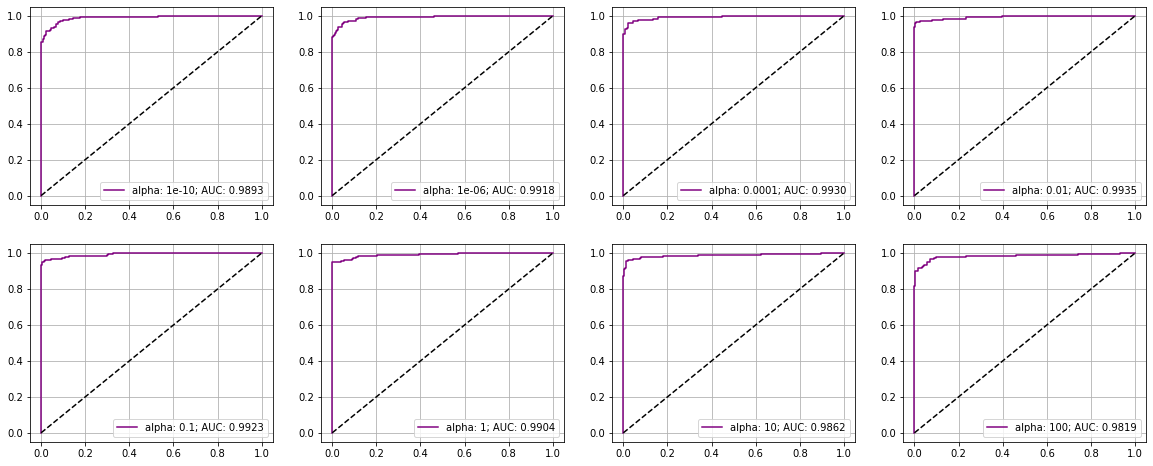

In [54]:
# Understand the effect of smoothing (scikit-learn won't 
# let you set alpha=0, contrary to their documentation):
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fig,axes=plt.subplots(nrows=2,ncols=4,figsize=(20,8))
alphas=[1e-10,1e-6,1e-4,1e-2,1e-1,1,10,100]
alpha_models={alpha:MultinomialNB(alpha=alpha) for alpha in alphas}
for i,alpha in enumerate(alphas):
    alpha_models[alpha].fit(vec_train_X["tfidf"],train_y)
    probas=alpha_models[alpha].predict_proba(vec_test_X["tfidf"])
    fpr,tpr,thresh=roc_curve(test_y,probas[:,1])
    axes[i//4,i%4].plot(fpr,tpr,color='purple',label=f"alpha: {alpha}; AUC: {roc_auc_score(test_y,probas[:,1]):.4f}")
    axes[i//4,i%4].plot([0,1],[0,1],color='k',linestyle='dashed')
    axes[i//4,i%4].legend(loc='lower right')
    axes[i//4,i%4].grid()

In [55]:
# 50 words most indicative of hip-hop according to Count vectorization + Multinomial NB:
hiphop_words=np.array(vectorizers["binary"].get_feature_names())[models["binary"].feature_log_prob_[1,:].argsort()[::-1][:50]]
hiphop_words

array(['get', 'like', 'know', 'got', 'go', 'see', 'make', 'come', 'man',
       'na', 'back', 'nigga', 'time', 'say', 'shit', 'one', 'want',
       'love', 'yeah', 'tell', 'let', 'ai', 'take', 'fuck', 'wan', 'look',
       'girl', 'right', 'put', 'choru', 'bitch', 'gon', 'never', 'feel',
       'give', 'money', 'ya', 'vers', 'caus', 'way', 'babi', 'need',
       'call', 'ca', 'keep', 'think', 'new', 'thing', 'around', 'tri'],
      dtype='<U31')

In [56]:
# 50 words most indicative of rock according to Count vectorization + Multinomial NB:
rock_words=np.array(vectorizers["binary"].get_feature_names())[models["binary"].feature_log_prob_[0,:].argsort()[::-1][:50]]
rock_words

array(['love', 'know', 'time', 'like', 'go', 'come', 'get', 'got', 'see',
       'one', 'make', 'day', 'oh', 'way', 'feel', 'say', 'take', 'away',
       'ca', 'na', 'yeah', 'look', 'life', 'let', 'never', 'heart',
       'night', 'want', 'tell', 'world', 'back', 'eye', 'right', 'well',
       'think', 'good', 'need', 'give', 'gon', 'leav', 'mind', 'man',
       'babi', 'home', 'live', 'dream', 'thing', 'girl', 'music', 'long'],
      dtype='<U31')

In [57]:
# What is the value of P(love,rock)? Recall that this is the estimator of
# the multinoulli parameter corresponding to the word "that" given class "hip-hop".
# If this value was not smoothened, what would it reveal about our training corpora?
print(f"P(love,rock)={math.e**max(models['binary'].feature_log_prob_[0,:]):.6f} (smoothened)")

P(love,rock)=0.415842 (smoothened)


In [58]:
# The actual bernoulli parameter of "love" given genre=rock. 
# What does this value reveal about "love" in rock songs?
count,songs=0,0
for i,song in enumerate(train_X):
    songs+=(train_y[i]==0)
    count+=("love" in song and train_y[i]==0)
print("P(love,rock) actual: ",count/songs)
print("P(love,rock) smooth: ",(count+1)/(songs+2))

P(love,rock) actual:  0.41563275434243174
P(love,rock) smooth:  0.4158415841584158


In [59]:
# Top 50 words for Hip Hop not present in top 50 for Rock words:
print(set(hiphop_words).difference(rock_words))

{'vers', 'ai', 'bitch', 'fuck', 'call', 'put', 'shit', 'around', 'choru', 'new', 'money', 'keep', 'ya', 'wan', 'tri', 'nigga', 'caus'}


In [60]:
## Top 50 words for Rock not present in top 50 for Hip Hop:
print(set(rock_words).difference(hiphop_words))

{'long', 'music', 'away', 'dream', 'leav', 'heart', 'life', 'day', 'home', 'mind', 'world', 'night', 'live', 'eye', 'well', 'good', 'oh'}


Note tokens "vers" and "choru": these are most likely "verse" and "chorus", which are "metadata tags" in lyrics and, ideally, should have been filtered out before modeling. It is not clear, however, why these words appear to be more indicative of hip hop songs than of rock songs.

A more informative way to find words specific to one genre and not the other could be to find those with the largest discrepancy between P(word,hiphop) and P(word,rock). For example, this can be implemented in the following way.

In [61]:
# This code will compute differences in percentiles of 
# parameter estimates for rock and for hip hop for each word:
from scipy.stats import percentileofscore
rock=models["binary"].feature_log_prob_[0,:]
hiphop=models["binary"].feature_log_prob_[1,:]
diffs={}
for i,word in enumerate(models["bow"].feature_log_prob_.T):
    diffs[percentileofscore(rock,word[0])-percentileofscore(hiphop,word[1])]=vectorizers["bow"].get_feature_names()[i]

In [62]:
# Find words with largest (rock-specific) and smallest (hip-hop specific) differences:
words=[w for s,w in sorted(diffs.items(),key=lambda kv: kv[0])]
print("Hip Hop specific words: \n",words[:30])
print("\n\nRock specific words: \n",words[::-1][:30])

Hip Hop specific words: 
 ['nigga', 'ya', 'fuck', 'money', 'yuh', 'work', 'ai', 'wan', 'сome', 'like', 'girl', 'got', 'know', 'man', 'go', 'tell', 'yeah', 'want', 'na', 'one', 'time', 'love', 'right', 'take', 'think', 'never', 'way', 'oh', 'would', 'year']


Rock specific words: 
 ['world', 'sun', 'life', 'well', 'tri', 'year', 'would', 'oh', 'way', 'never', 'think', 'take', 'right', 'love', 'time', 'one', 'na', 'want', 'yeah', 'tell', 'go', 'man', 'know', 'got', 'girl', 'like', 'сome', 'wan', 'ai', 'work']
